#### Proposal 
- Names of team members

    * Amy Steward
    * Justin Nhan
    * Kevin Pradjinata

- A primary dataset you intend to analyze,
https://www.kaggle.com/datasets/everydaycodings/produce-prices-dataset

- Initial plots, figures, or tables
(Amy)

- Some of the variables (column names) you intend to explore and what kind of insights you expect to glean,
(Justin)

- Supplemental datasets, if any, to complement your primary dataset - this means links, columns that you'll join on, etc.
(Kevin)

- What you plan to cover in the final report and how you plan to organize it.
(Kevin)


### Initial Plots, Figures or Tables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# Amy Load data
directory = '/Users/amysteward/Desktop/BERKELEY MIDS/DataSets/'
file_name = 'ProductPriceIndex.csv'
location = directory+file_name

ppi = pd.read_csv(location, index_col=False)
ppi.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [3]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   productname       15766 non-null  object
 1   date              15766 non-null  object
 2   farmprice         15766 non-null  object
 3   atlantaretail     15766 non-null  object
 4   chicagoretail     15766 non-null  object
 5   losangelesretail  15766 non-null  object
 6   newyorkretail     15766 non-null  object
 7   averagespread     15766 non-null  object
dtypes: object(8)
memory usage: 985.5+ KB


In [4]:
## Data Cleaning - remove dollar sign from prices, change into float for analyses
## remove empty strings and replace with NaN to convert to float

## change datatype from dollar to float for analysis
ppi['farmprice'] = ppi['farmprice'].str.replace("$","",regex=False).astype(str)
ppi['atlantaretail'] = ppi['atlantaretail'].str.replace("$","",regex=False).astype(str)
ppi['chicagoretail'] = ppi['chicagoretail'].str.replace("$","",regex=False).astype(str)
ppi['losangelesretail'] = ppi['losangelesretail'].str.replace("$","",regex=False).astype(str)
ppi['newyorkretail'] = ppi['newyorkretail'].str.replace("$","",regex=False).astype(str)
ppi['date']=pd.to_datetime(ppi['date'])

In [5]:
ppi.replace('',np.nan,inplace = True)

In [6]:
cols_to_float = ['farmprice','atlantaretail','chicagoretail','losangelesretail','newyorkretail']
ppi[cols_to_float]=ppi[cols_to_float].astype(float)

In [7]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productname       15766 non-null  object        
 1   date              15766 non-null  datetime64[ns]
 2   farmprice         15765 non-null  float64       
 3   atlantaretail     15765 non-null  float64       
 4   chicagoretail     15766 non-null  float64       
 5   losangelesretail  15766 non-null  float64       
 6   newyorkretail     15758 non-null  float64       
 7   averagespread     15766 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 985.5+ KB


In [8]:
ppi.sort_values(by='productname')

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
9466,Asparagus,2007-07-01,2.97,3.48,3.66,3.66,3.99,24.49%
868,Asparagus,2018-04-22,2.43,2.56,2.61,3.49,3.24,22.43%
11344,Asparagus,2005-04-17,1.50,3.17,2.61,1.98,2.37,68.83%
11526,Asparagus,2005-01-16,1.19,3.10,3.66,3.12,3.74,186.13%
7909,Asparagus,2009-04-26,1.49,3.24,3.57,2.99,2.57,107.55%
...,...,...,...,...,...,...,...,...
7523,Tomatoes,2009-09-27,0.31,1.75,2.26,2.99,1.77,607.26%
10797,Tomatoes,2005-11-13,0.46,2.02,2.49,1.99,1.99,361.41%
13411,Tomatoes,2002-10-06,0.38,2.17,2.24,2.63,1.75,478.29%
7496,Tomatoes,2009-10-04,0.45,1.82,2.26,2.49,1.69,358.89%


In [9]:
ppi.shape

(15766, 8)

In [10]:
ppi.describe()

,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail
count,15766,15765.000000,15765.000000,15766.000000,15766.000000,15758.000000
mean,2009-06-18 14:23:23.831028992,0.595343,1.756017,1.716432,1.721203,1.973434
min,1999-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004-09-05 00:00:00,0.280000,1.190000,1.220000,1.120000,1.370000
50%,2009-05-10 00:00:00,0.430000,1.510000,1.610000,1.490000,1.790000
75%,2014-04-20 00:00:00,0.780000,2.080000,2.070000,1.990000,2.320000
max,2019-05-19 00:00:00,9.000000,7.210000,6.240000,7.460000,41.490000
std,NaN,0.482918,0.958652,0.969736,0.925166,1.123036


In [11]:
ppi['month']=ppi['date'].dt.month

In [12]:
ppi['year'] = ppi['date'].dt.year

In [13]:
ppi['month_year']= ppi['date'].dt.strftime("%b-%Y")

In [14]:
ppi.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,month,year,month_year
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%,5,2019,May-2019
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57%,5,2019,May-2019
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19%,5,2019,May-2019
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50%,5,2019,May-2019
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71%,5,2019,May-2019


In [15]:
ppi.farmprice.groupby(ppi.year).count()

year
1999    122
2000    831
2001    768
2002    803
2003    851
2004    828
2005    865
2006    853
2007    868
2008    853
2009    803
2010    822
2011    798
2012    841
2013    718
2014    794
2015    770
2016    737
2017    790
2018    793
2019    257
Name: farmprice, dtype: int64

In [16]:
ppi_date_trim = ppi[(ppi['year']>=2015)&(ppi['year']<=2024)]
ppi_date_trim.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,month,year,month_year
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%,5,2019,May-2019
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57%,5,2019,May-2019
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19%,5,2019,May-2019
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50%,5,2019,May-2019
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71%,5,2019,May-2019


In [17]:
ppi_date_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3348 entries, 0 to 3347
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productname       3348 non-null   object        
 1   date              3348 non-null   datetime64[ns]
 2   farmprice         3347 non-null   float64       
 3   atlantaretail     3347 non-null   float64       
 4   chicagoretail     3348 non-null   float64       
 5   losangelesretail  3348 non-null   float64       
 6   newyorkretail     3340 non-null   float64       
 7   averagespread     3348 non-null   object        
 8   month             3348 non-null   int32         
 9   year              3348 non-null   int32         
 10  month_year        3348 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(2), object(3)
memory usage: 287.7+ KB


In [18]:
ppi_date_trim['productname'].value_counts()

productname
Broccoli Crowns       227
Iceberg Lettuce       227
Green Leaf Lettuce    227
Cauliflower           226
Red Leaf Lettuce      226
Romaine Lettuce       225
Carrots               225
Strawberries          225
Celery                224
Oranges               216
Broccoli Bunches      183
Potatoes              150
Avocados              150
Flame Grapes          121
Cantaloupe            108
Honeydews             105
Tomatoes               68
Thompson Grapes        54
Nectarines             50
Peaches                47
Plums                  36
Asparagus              28
Name: count, dtype: int64

In [19]:
fruit_chart_filter = ppi_date_trim[ppi_date_trim['productname'].isin(["Broccoli Crowns","Strawberries","Carrots","Romaine Lettuce","Cauliflower"])]

In [20]:
fruit_chart_filter['month_year']=pd.to_datetime(fruit_chart_filter['month_year'])

/var/folders/jp/k37xchh97ds9k08g2l3r3gj40000gn/T/ipykernel_25902/1030132051.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fruit_chart_filter['month_year']=pd.to_datetime(fruit_chart_filter['month_year'])
/var/folders/jp/k37xchh97ds9k08g2l3r3gj40000gn/T/ipykernel_25902/1030132051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruit_chart_filter['month_year']=pd.to_datetime(fruit_chart_filter['month_year'])


In [21]:
fruit_chart_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 3344
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productname       1128 non-null   object        
 1   date              1128 non-null   datetime64[ns]
 2   farmprice         1128 non-null   float64       
 3   atlantaretail     1128 non-null   float64       
 4   chicagoretail     1128 non-null   float64       
 5   losangelesretail  1128 non-null   float64       
 6   newyorkretail     1124 non-null   float64       
 7   averagespread     1128 non-null   object        
 8   month             1128 non-null   int32         
 9   year              1128 non-null   int32         
 10  month_year        1128 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int32(2), object(2)
memory usage: 96.9+ KB


In [22]:
fruit_chart = fruit_chart_filter.farmprice.groupby([fruit_chart_filter.month_year,fruit_chart_filter.productname])

In [23]:
strawberry_yoy = fruit_chart_filter[fruit_chart_filter['productname'].isin(["Strawberries"])]
broccoli_yoy = fruit_chart_filter[fruit_chart_filter['productname'].isin(["Broccoli Crowns"])]
carrots_yoy = fruit_chart_filter[fruit_chart_filter['productname'].isin(["Carrots"])]
romaine_yoy = fruit_chart_filter[fruit_chart_filter['productname'].isin(["Romaine Lettuce"])]
cauliflower_yoy = fruit_chart_filter[fruit_chart_filter['productname'].isin(["Cauliflower"])]

In [24]:
strawb_chart = strawberry_yoy.farmprice.groupby([strawberry_yoy.month,strawberry_yoy.year])
broccoli_chart = broccoli_yoy.farmprice.groupby([broccoli_yoy.month,broccoli_yoy.year])
romaine_chart = romaine_yoy.farmprice.groupby([romaine_yoy.month,romaine_yoy.year])
cauliflower_chart = cauliflower_yoy.farmprice.groupby([cauliflower_yoy.month,cauliflower_yoy.year])
carrots_chart = carrots_yoy.farmprice.groupby([carrots_yoy.month,carrots_yoy.year])


In [25]:
import matplotlib.ticker as mtick

# Building Farm Price over time charts

- The first chart looks at all fruit in all cities over time 

## Year over Year Charts: Monthly Fruit Farm Prices 

- Each subsequent chart looks at the monthly farm price comparing the price year over year for each different fruit

In [26]:
## Create a generic plot function

def fruit_plot(data, title1):
    """
   This Function will pull in a dataframe for each different fruit to create a chart to look at city cost / farm  
   cost for each city and format each chart in a similar way.
    """
    # Calculate mean, unstack, and plot
    plot = data.mean().unstack().plot()
    
    # Customize legend
    plot.legend(title=title1, bbox_to_anchor=(1.37, 1.01), loc='upper right')
    
    #Create Title
    plot.set_title(title1)
    
    # Set axis labels
    plot.set_xlabel('Month of Year')
    plot.set_ylabel('Farm Price in $')
    
    # Format y-axis as currency
    fmt = '${x:,.2f}'
    tick = mtick.StrMethodFormatter(fmt)
    plot.yaxis.set_major_formatter(tick)
    
    return plot


## Price Trend Analysis

This analysis was to understand the overarching trend in farm prices in order to find and identify any patterns around farm pricing to investigate. 


## Initial Investigation - Year over Year Farm Price Analysis by Product

The cleaned dataframe was segmented into groups for each separate product. This allowed for a year over year (YOY) analysis of farm price for each separate product. 

A function to create the Fruit Plot was created to quickly create charts for each fruit individually and all fruits together.

### YOY Farm Price Analysis - All Fruit Plot

Here, the 'All Fruit Plot' compares the farm price for each fruit on a single plot. It's easy to see Strawberries and Cauliflower have the highest Farm Price and tend to be higher towards the end of the year.

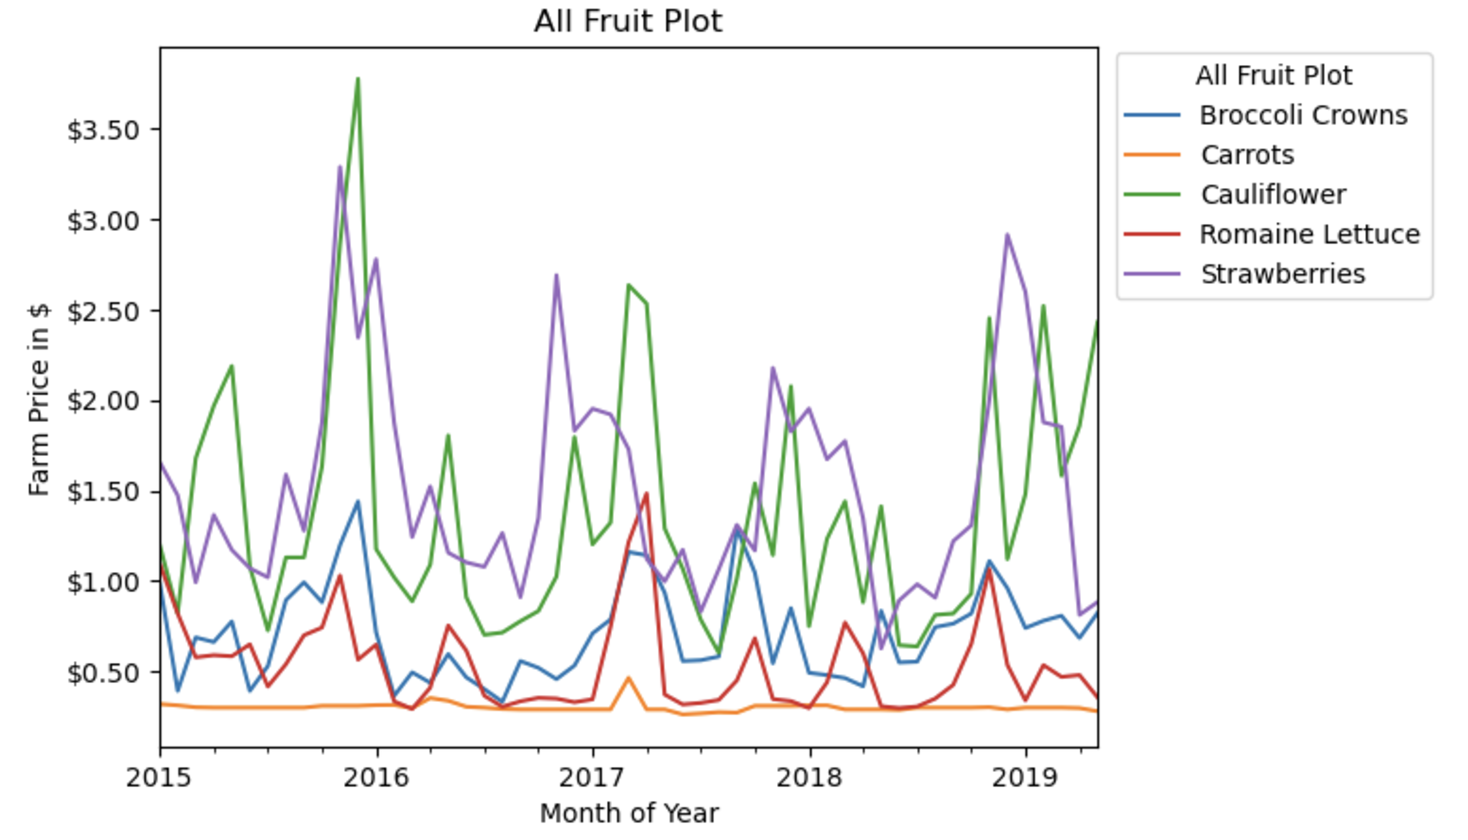


### Strawberry Farm Price 

Strawberry Farm Price from 2015 - 2019 shows significantly consistency with a spike every year in November at above $3 and a low of $0.50, and prices slowly dropping until they hit a low point in June. The Farm Price was the highest in November 2015.

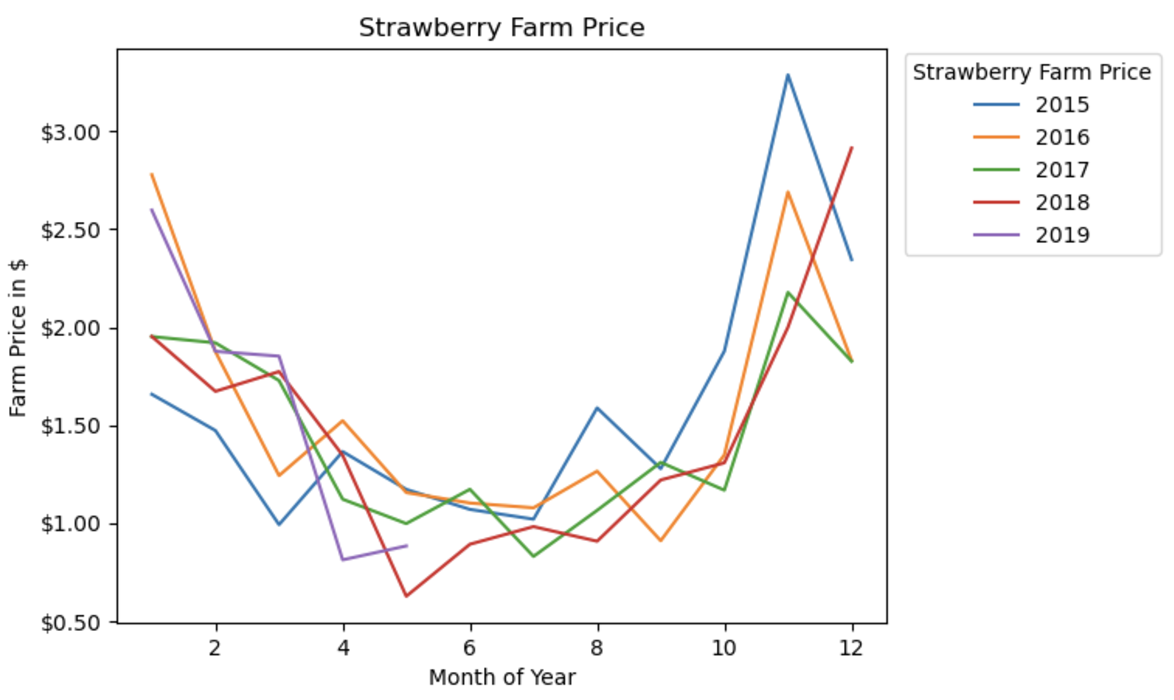


### Broccoli, Romaine and Carrot Farm Price

The YOY Broccoli Farm Price does not show any easily observable or consistent pattern. The Farm Price ranges from `$0.40 - $1.40` for broccoli.

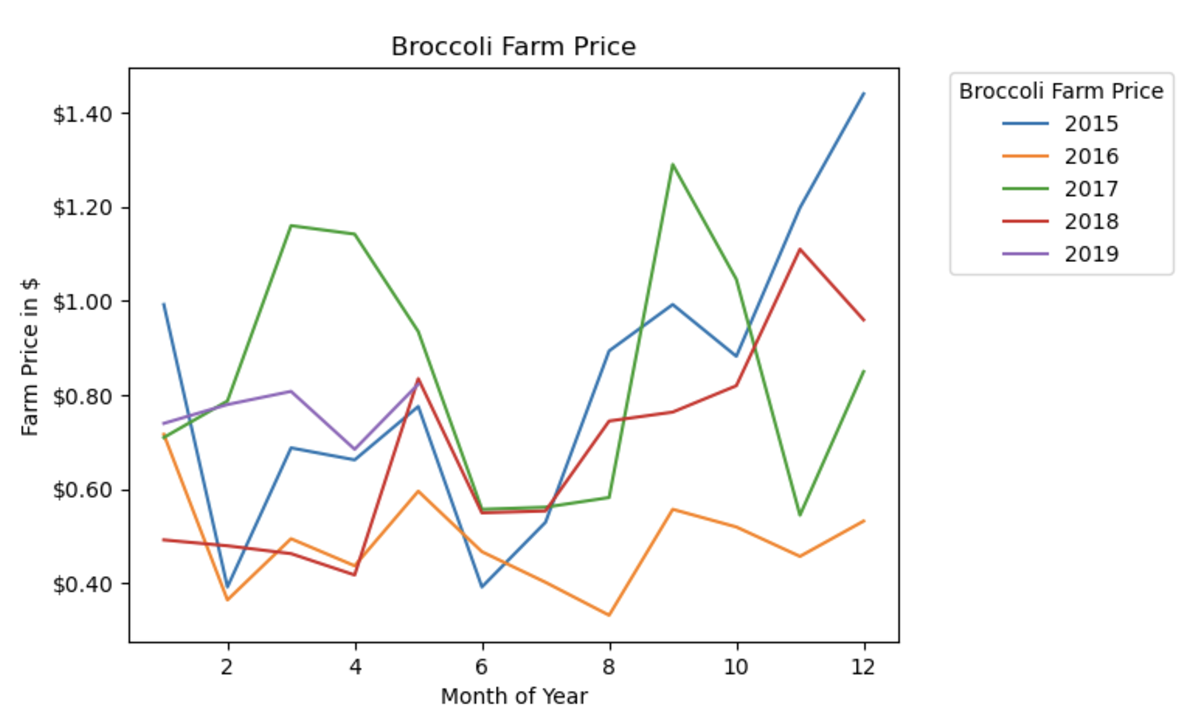

Similarly, the Romaine and Carrot farm prices remain higher towards the begining of the year, however, both product prices drop around June.

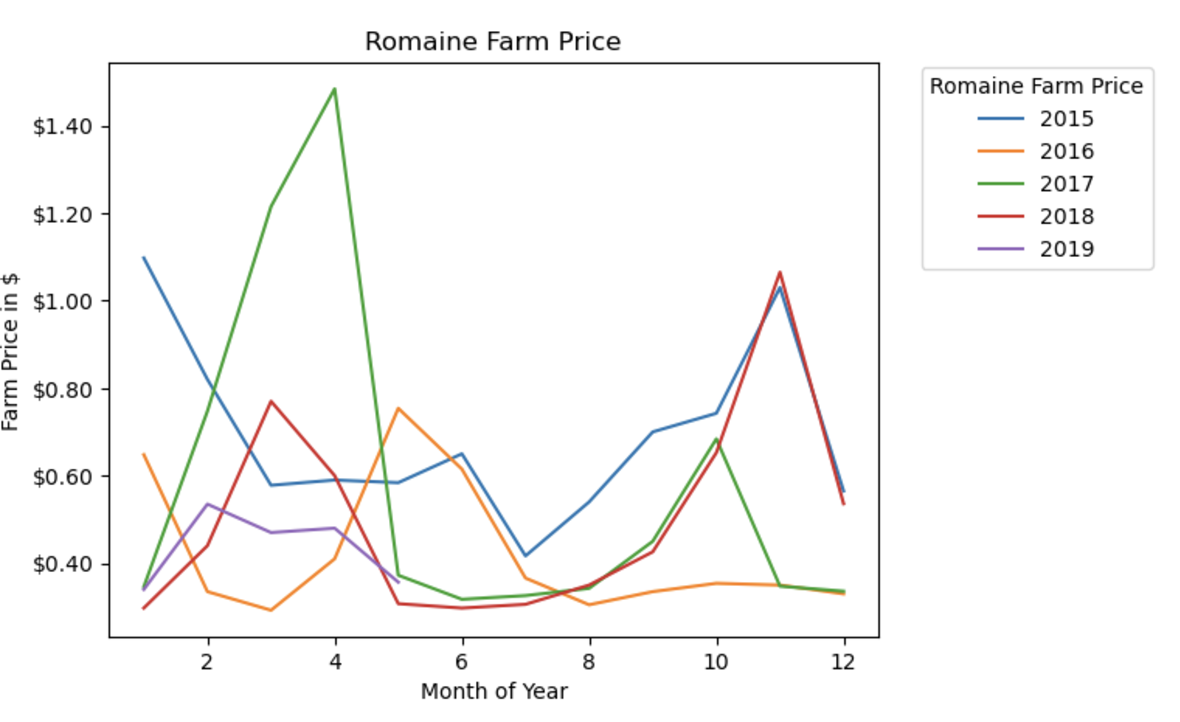

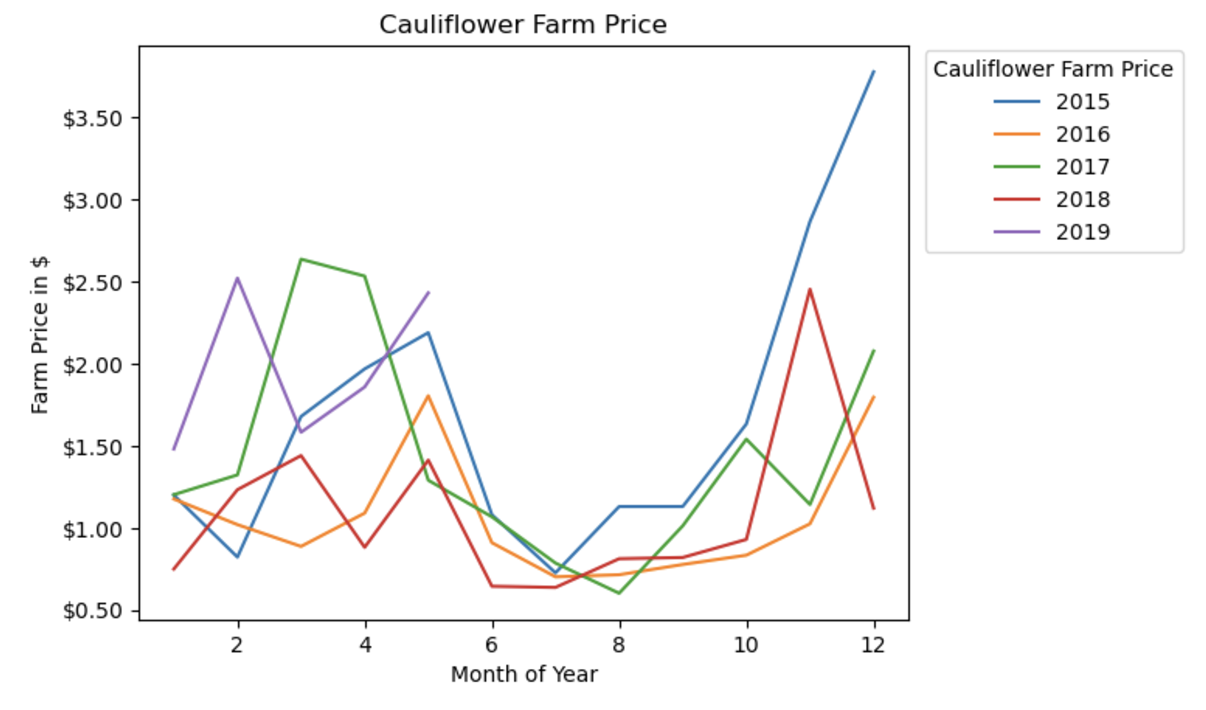



### Carrot Farm Price

The YOY Carrot Farm Price remains fairly





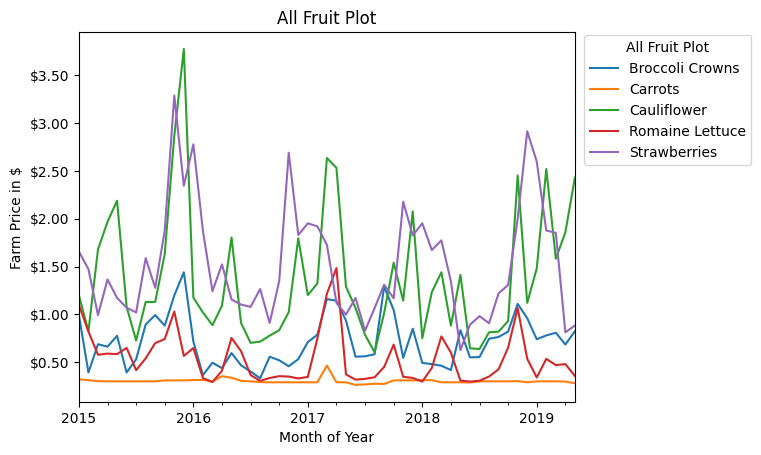

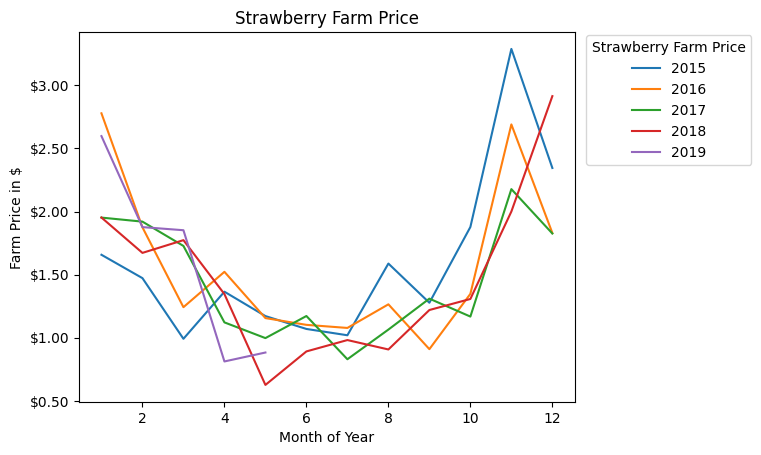

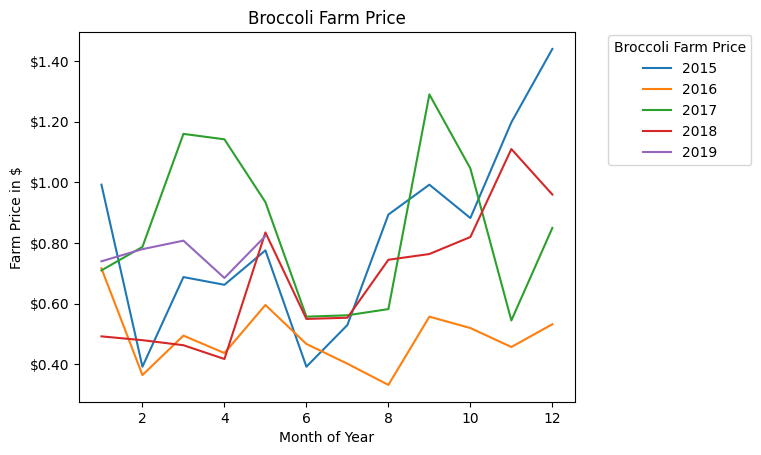

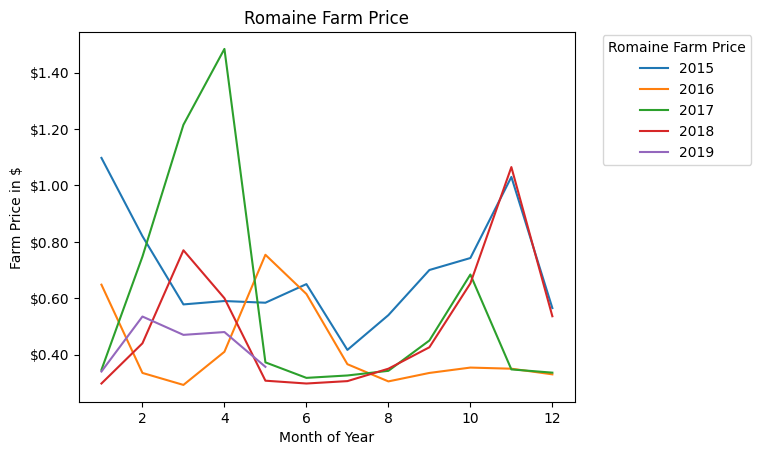

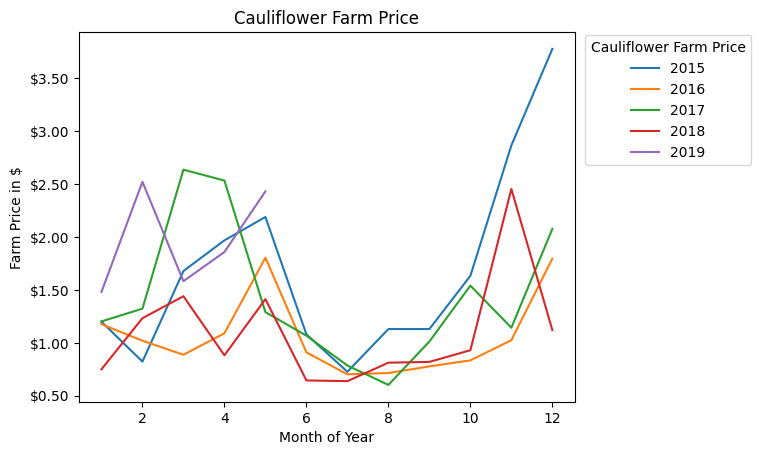

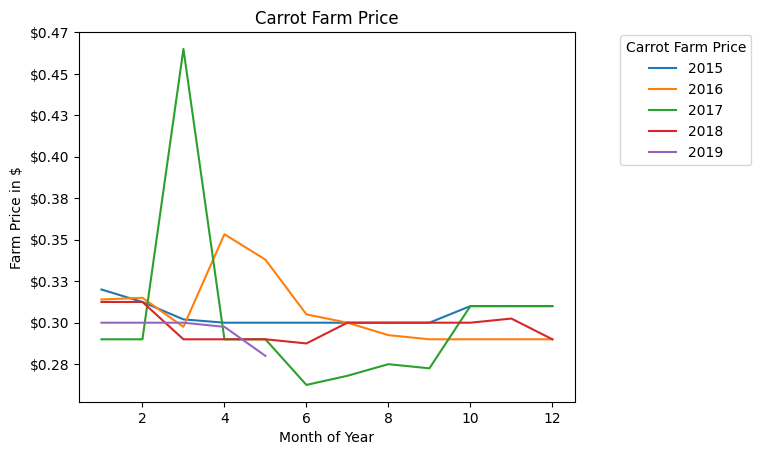

In [27]:

fruit_overall = fruit_plot(fruit_chart,"All Fruit Plot")
strawb_plot = fruit_plot(strawb_chart, "Strawberry Farm Price")
broccoli_plot = fruit_plot(broccoli_chart,"Broccoli Farm Price")
romane_plot = fruit_plot(romaine_chart,"Romaine Farm Price")
caul_plot = fruit_plot(cauliflower_chart,"Cauliflower Farm Price")
carrot_plot = fruit_plot(carrots_chart, "Carrot Farm Price")

# Comparing fruit sell for each city to farm price

The below cells will calculate the markup ratio, which is the calculated as the retail price / farm price. 

The markup ratio can be multiplied by the farm price to estimate the retail price. This part of the analysis will provide information on how the markup ratio vaies among cities for the same product. 

In [28]:
fruit_chart_filter.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,month,year,month_year
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%,5,2019,2019-05-01
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57%,5,2019,2019-05-01
8,Cauliflower,2019-05-19,1.22,3.24,4.35,4.03,2.97,198.98%,5,2019,2019-05-01
9,Carrots,2019-05-19,0.24,0.95,0.95,0.99,1.22,328.13%,5,2019,2019-05-01
11,Broccoli Crowns,2019-05-19,0.73,1.49,1.80,1.99,1.99,148.97%,5,2019,2019-05-01


In [29]:
fruit_ratio = fruit_chart_filter

In [30]:
# Calculate the markup ratio for each city

fruit_ratio['atl_farm'] = fruit_ratio['atlantaretail']/fruit_ratio['farmprice']
fruit_ratio['chi_farm'] = fruit_ratio['chicagoretail']/fruit_ratio['farmprice']
fruit_ratio['la_farm'] = fruit_ratio['losangelesretail']/fruit_ratio['farmprice']
fruit_ratio['ny_farm'] = fruit_ratio['newyorkretail']/fruit_ratio['farmprice']

fruit_ratio

/var/folders/jp/k37xchh97ds9k08g2l3r3gj40000gn/T/ipykernel_25902/299555284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruit_ratio['atl_farm'] = fruit_ratio['atlantaretail']/fruit_ratio['farmprice']
/var/folders/jp/k37xchh97ds9k08g2l3r3gj40000gn/T/ipykernel_25902/299555284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruit_ratio['chi_farm'] = fruit_ratio['chicagoretail']/fruit_ratio['farmprice']
/var/folders/jp/k37xchh97ds9k08g2l3r3gj40000gn/T/ipykernel_25902/299555284.py:5: SettingWithCopyWa

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,month,year,month_year,atl_farm,chi_farm,la_farm,ny_farm
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%,5,2019,2019-05-01,1.922414,1.465517,1.715517,2.189655
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57%,5,2019,2019-05-01,4.914286,5.714286,4.828571,5.685714
8,Cauliflower,2019-05-19,1.22,3.24,4.35,4.03,2.97,198.98%,5,2019,2019-05-01,2.655738,3.565574,3.303279,2.434426
9,Carrots,2019-05-19,0.24,0.95,0.95,0.99,1.22,328.13%,5,2019,2019-05-01,3.958333,3.958333,4.125000,5.083333
11,Broccoli Crowns,2019-05-19,0.73,1.49,1.80,1.99,1.99,148.97%,5,2019,2019-05-01,2.041096,2.465753,2.726027,2.726027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Romaine Lettuce,2015-01-04,0.89,1.56,1.74,1.42,2.33,98.03%,1,2015,2015-01-01,1.752809,1.955056,1.595506,2.617978
3341,Strawberries,2015-01-04,1.38,3.24,3.79,3.74,3.32,155.25%,1,2015,2015-01-01,2.347826,2.746377,2.710145,2.405797
3342,Broccoli Crowns,2015-01-04,1.08,2.12,1.75,1.67,1.99,74.31%,1,2015,2015-01-01,1.962963,1.620370,1.546296,1.842593
3343,Carrots,2015-01-04,0.32,0.96,0.90,0.96,1.22,215.63%,1,2015,2015-01-01,3.000000,2.812500,3.000000,3.812500


In [31]:
retail_vs_markup_ratio = fruit_ratio.drop(columns = ["averagespread","month","year","date"])
retail_vs_markup_ratio.sort_values(by = "productname")

,productname,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,month_year,atl_farm,chi_farm,la_farm,ny_farm
865,Broccoli Crowns,0.38,1.69,1.58,1.99,2.11,2018-04-01,4.447368,4.157895,5.236842,5.552632
514,Broccoli Crowns,0.58,1.62,2.00,1.84,1.60,2018-09-01,2.793103,3.448276,3.172414,2.758621
1261,Broccoli Crowns,1.71,2.10,1.32,1.94,NaN,2017-09-01,1.228070,0.771930,1.134503,NaN
2773,Broccoli Crowns,0.82,1.93,1.92,2.02,2.03,2015-09-01,2.353659,2.341463,2.463415,2.475610
2088,Broccoli Crowns,0.36,1.79,1.87,1.49,1.53,2016-08-01,4.972222,5.194444,4.138889,4.250000
...,...,...,...,...,...,...,...,...,...,...,...
2456,Strawberries,1.09,1.99,2.29,2.87,2.87,2016-03-01,1.825688,2.100917,2.633028,2.633028
938,Strawberries,1.44,2.37,2.24,2.66,2.99,2018-03-01,1.645833,1.555556,1.847222,2.076389
2446,Strawberries,1.38,2.36,1.87,2.69,3.19,2016-03-01,1.710145,1.355072,1.949275,2.311594
448,Strawberries,0.92,3.09,2.41,3.24,3.56,2018-09-01,3.358696,2.619565,3.521739,3.869565


In [32]:
## Here I build a dataframe for each separate fruit 

strawberry_yoy2 = fruit_ratio[fruit_chart_filter['productname'].isin(["Strawberries"])]
broccoli_yoy2 = fruit_ratio[fruit_chart_filter['productname'].isin(["Broccoli Crowns"])]
carrots_yoy2 = fruit_ratio[fruit_chart_filter['productname'].isin(["Carrots"])]
romaine_yoy2 = fruit_ratio[fruit_chart_filter['productname'].isin(["Romaine Lettuce"])]
cauliflower_yoy2 = fruit_ratio[fruit_chart_filter['productname'].isin(["Cauliflower"])]

In [33]:
## testing out the strawberry data frame and dropping unnecessary columns

strawberry_yoy2_drop = strawberry_yoy2.drop(columns = ["productname","farmprice","atlantaretail","chicagoretail","losangelesretail","newyorkretail","averagespread","month","year","date"])

In [34]:
strawberry_yoy2_drop

,month_year,atl_farm,chi_farm,la_farm,ny_farm
0,2019-05-01,1.922414,1.465517,1.715517,2.189655
13,2019-05-01,2.934066,2.076923,2.714286,2.923077
27,2019-05-01,4.172414,3.258621,3.655172,5.017241
39,2019-04-01,4.810345,3.362069,4.103448,5.103448
52,2019-04-01,4.231884,2.956522,3.449275,4.579710
...,...,...,...,...,...
3289,2015-02-01,1.430851,1.324468,1.723404,2.122340
3310,2015-01-01,1.537143,1.422857,1.782857,1.851429
3320,2015-01-01,1.708571,1.697143,1.622857,1.782857
3331,2015-01-01,1.565714,1.565714,1.571429,1.925714


In [35]:
# unpiovt the strawberry data frame so I can create a chart with this information 
straw_by_city = pd.melt(strawberry_yoy2_drop,id_vars=["month_year"],var_name = 'city',value_name = "city_ov_fp")
straw_by_city

,month_year,city,city_ov_fp
0,2019-05-01,atl_farm,1.922414
1,2019-05-01,atl_farm,2.934066
2,2019-05-01,atl_farm,4.172414
3,2019-04-01,atl_farm,4.810345
4,2019-04-01,atl_farm,4.231884
...,...,...,...
895,2015-02-01,ny_farm,2.122340
896,2015-01-01,ny_farm,1.851429
897,2015-01-01,ny_farm,1.782857
898,2015-01-01,ny_farm,1.925714


In [36]:
## creating the groupby for the strawberry fruit to get the month year, city, and mean strawberry price for that month

strab = straw_by_city.city_ov_fp.groupby([straw_by_city.month_year,straw_by_city.city])
strab.mean() 

month_year  city    
2015-01-01  atl_farm    1.789814
            chi_farm    1.858023
            la_farm     1.921822
            ny_farm     1.991449
2015-02-01  atl_farm    1.931430
                          ...   
2019-04-01  ny_farm     4.233753
2019-05-01  atl_farm    3.009631
            chi_farm    2.267020
            la_farm     2.694992
            ny_farm     3.376658
Name: city_ov_fp, Length: 212, dtype: float64

#### the below cells shape the data inorder to build required charts

In [37]:
## Using the strawberry example above, i built a fuction to apply to all the other fruits to get the data frames columns dropped and unpivoted for charting
def unpiv_fx(df):
    df = df.drop(columns = ["productname","farmprice","atlantaretail","chicagoretail","losangelesretail","newyorkretail","averagespread","month","year","date"])
    return pd.melt(df,id_vars=["month_year"],var_name = 'city',value_name = "city_ov_fp")

In [38]:
## Applying the function for each fruit to 1) drop unnecessary columns and 2) unpivot the table for each fruit
broccoli_unpiv = unpiv_fx(broccoli_yoy2)
carrot_unpiv   = unpiv_fx(carrots_yoy2)
romaine_unpiv  = unpiv_fx(romaine_yoy2)
caul_unpiv     = unpiv_fx(cauliflower_yoy2)

In [39]:
broccoli_unpiv

,month_year,city,city_ov_fp
0,2019-05-01,atl_farm,2.041096
1,2019-05-01,atl_farm,2.037037
2,2019-05-01,atl_farm,1.774194
3,2019-04-01,atl_farm,1.750000
4,2019-04-01,atl_farm,2.426667
...,...,...,...
903,2015-02-01,ny_farm,4.937500
904,2015-01-01,ny_farm,4.156250
905,2015-01-01,ny_farm,3.358974
906,2015-01-01,ny_farm,1.612245


In [40]:
## Using the strawberry example above, I created this function to groupby each unpivoted dataframe to create charts

def unpiv_groupby(table_name):
    return table_name.city_ov_fp.groupby([table_name.month_year,table_name.city])

In [41]:
## leveraging the function to unpivot the data

br_gb      = unpiv_groupby(broccoli_unpiv)
car_gb     = unpiv_groupby(carrot_unpiv)
romaine_gb = unpiv_groupby(romaine_unpiv)
caul_gb    = unpiv_groupby(caul_unpiv)

In [42]:
## Create a generic plot function for each fruit to build consistent plot to plot the City Retail / Farm Cost for each fruit

def city_rev(data, title1):
    """
   Create a generic plot function for each fruit to build consistent plot to plot the City Retail / Farm Cost for each fruit
    """
    # Calculate mean, unstack, and plot
    plot = data.mean().unstack().plot()
    
    # Customize legend
    plot.legend(title=title1, bbox_to_anchor=(1.5, 1.01), loc='upper right')
    
    #Create Title
    plot.set_title(title1)
    
    # Set axis labels
    plot.set_xlabel('Month of Year')
    plot.set_ylabel('Markup Ratio: City Retail / Farm Cost in $')
    
    # Format y-axis as currency
    fmt = '{x:,.2f}'
    tick = mtick.StrMethodFormatter(fmt)
    plot.yaxis.set_major_formatter(tick)
    
    return plot


<Axes: title={'center': 'Markup Ratio: Strawberry \n City Price / Farm Price'}, xlabel='Month of Year', ylabel='Markup Ratio: City Retail / Farm Cost in $'>

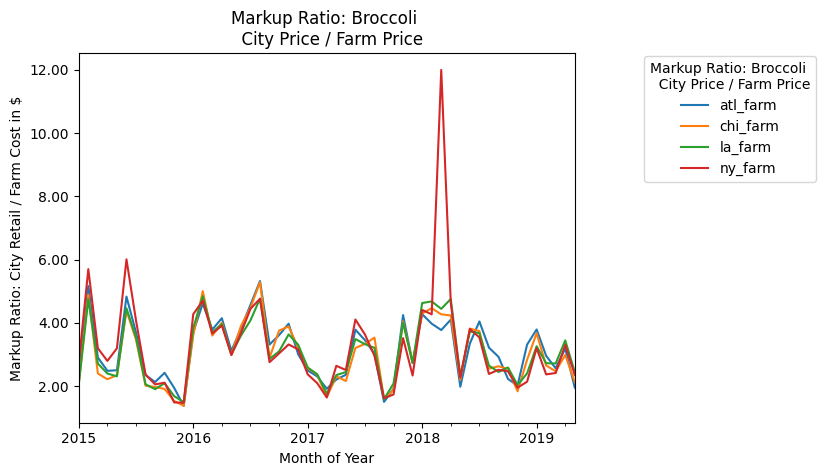

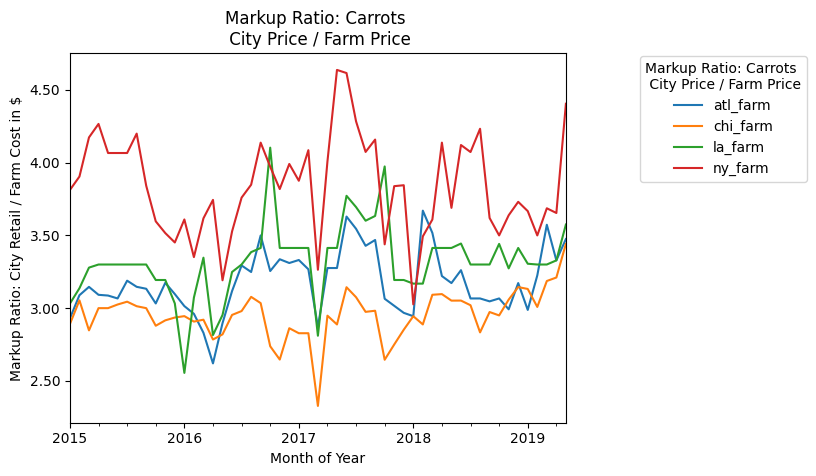

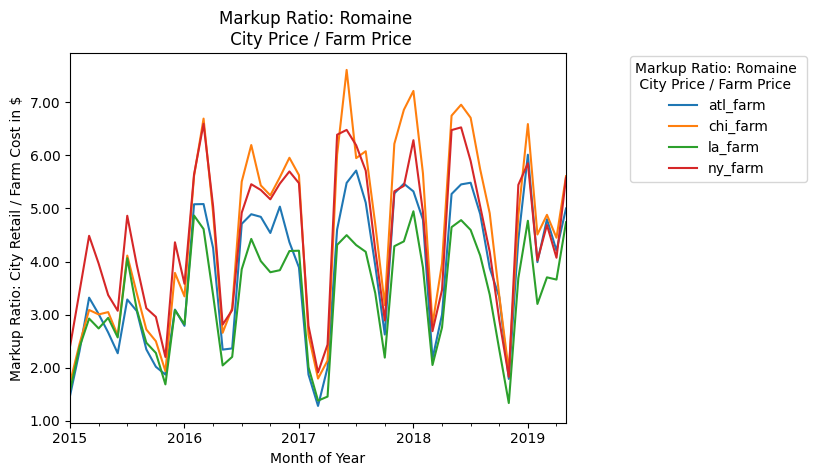

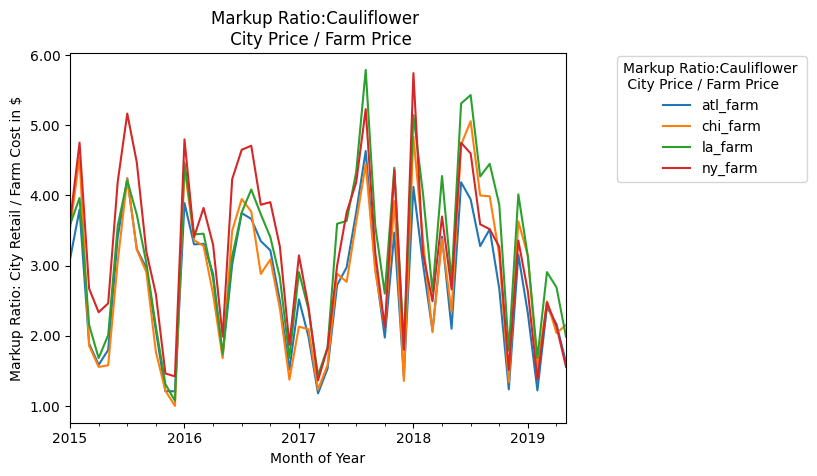

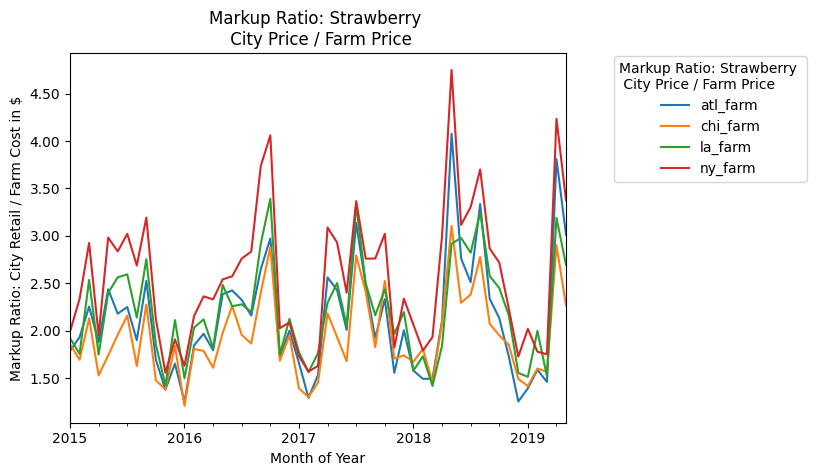

In [43]:
## Building the plots using the function above

city_rev(br_gb,"Markup Ratio: Broccoli \n  City Price / Farm Price")
city_rev(car_gb,"Markup Ratio: Carrots \n City Price / Farm Price")
city_rev(romaine_gb,"Markup Ratio: Romaine \n City Price / Farm Price")
city_rev(caul_gb,"Markup Ratio:Cauliflower \n City Price / Farm Price")
city_rev(strab,"Markup Ratio: Strawberry \n City Price / Farm Price")

## Identifying the Markup Ratio difference between the min/max  

Here we will look at the min-max and standard deviation for the in month markup ratios for each city.
Then we can take the avg and stdev overall for each min-max and standard deviation to understand the variation of the markup ratios for each product.

products with a  difference of min-max for the standard deviation will have 

In [44]:
br_gb.mean()

month_year  city    
2015-01-01  atl_farm    2.315640
            chi_farm    2.083795
            la_farm     2.060777
            ny_farm     2.742515
2015-02-01  atl_farm    5.165967
                          ...   
2019-04-01  ny_farm     3.306310
2019-05-01  atl_farm    1.950775
            chi_farm    2.128303
            la_farm     2.440867
            ny_farm     2.349934
Name: city_ov_fp, Length: 212, dtype: float64

In [45]:
def mean_markup(fx):
    df = fx.mean().groupby("month_year").mean().reset_index()
    df['month_year'] = pd.to_datetime(df['month_year'])
    df['year']=df['month_year'].dt.year
    df.groupby('year').city_ov_fp.mean()
    return df

In [46]:
return df.groupby('year').city_ov_fp.mean()

SyntaxError: 'return' outside function (1027480032.py, line 1)

In [ ]:
broccoli_mean_fr   =mean_markup(br_gb).groupby('year').city_ov_fp.mean().reset_index()
carrot_mean_fr     =mean_markup(car_gb).groupby('year').city_ov_fp.mean().reset_index()
romaine_mean_fr    =mean_markup(romaine_gb).groupby('year').city_ov_fp.mean().reset_index()
cauliflower_mean_fr=mean_markup(caul_gb).groupby('year').city_ov_fp.mean().reset_index()
strawberry_mean_fr =mean_markup(strab).groupby('year').city_ov_fp.mean().reset_index()

broccoli_mean_fr

In [ ]:
merged_df = pd.merge(carrot_mean_fr,cauliflower_mean_fr, on='year')
merged_df = pd.merge(merged_df,strawberry_mean_fr, on='year')
merged_df.columns = ['year','carrots','cauliflower','strawberry']
merged_df = pd.merge(merged_df,romaine_mean_fr,on='year')
merged_df.rename(columns = {'city_ov_fp':'romaine'},inplace = True)
merged_df = pd.merge(merged_df,broccoli_mean_fr,on='year')
merged_df.rename(columns = {'city_ov_fp':'broccoli'},inplace=True)
mean_produce_fr = merged_df
mean_product_ft = mean_produce_fr.set_index('year')

In [ ]:
sns.heatmap(mean_product_ft[:4], annot=True, cmap="YlGnBu")
plt.show()

## Markup Diff

In [ ]:
## Create a function calculating the min-max of each product

def max_markup_ratio(fx):
    return fx.mean().groupby("month_year").max()

In [ ]:
broccoli_max_mr = max_markup_ratio   (br_gb)
carrots_max_mr = max_markup_ratio    (car_gb)
romaine_max_mr =max_markup_ratio     (romaine_gb)
cauliflower_max_mr =max_markup_ratio (caul_gb)
strawberries_max_mr =max_markup_ratio(strab)


In [ ]:
def min_markup_ratio(fx):
    return fx.mean().groupby("month_year").min()

In [ ]:
broccoli_min_mr     = min_markup_ratio(br_gb)
carrots_min_mr      = min_markup_ratio(car_gb)
romaine_min_mr      = min_markup_ratio(romaine_gb)
cauliflower_min_mr  = min_markup_ratio(caul_gb)
strawberries_min_mr = min_markup_ratio(strab)

In [ ]:
## min - max
diff_broccoli = broccoli_max_mr-broccoli_min_mr
diff_carrots = carrots_max_mr-carrots_min_mr
diff_romaine = romaine_max_mr-romaine_min_mr
diff_cauliflower = cauliflower_max_mr-cauliflower_min_mr
diff_strawberries = strawberries_max_mr-strawberries_min_mr

In [ ]:
diff_broccoli_df = pd.DataFrame(diff_broccoli)
diff_broccoli_df.head(2)

In [ ]:
diff_broccoli_df=diff_broccoli_df.reset_index()
diff_carrots=diff_carrots.reset_index()
diff_romaine=diff_romaine.reset_index()
diff_cauliflower=diff_cauliflower.reset_index()
diff_strawberries=diff_strawberries.reset_index()

In [ ]:
diff_broccoli_df['month_year'] = pd.to_datetime(diff_broccoli_df['month_year'])
diff_broccoli_df['year']=diff_broccoli_df['month_year'].dt.year

In [ ]:
def transform_data_min_max_median(df):
    df['month_year'] = pd.to_datetime(df['month_year'])
    df['year']=df['month_year'].dt.year

In [ ]:
carrots_df_diff = transform_data_min_max_median(diff_carrots)
romaine_df_diff=transform_data_min_max_median(  diff_romaine)
cauli_df_diff=transform_data_min_max_median(    diff_cauliflower)
strawb_df_diff=transform_data_min_max_median(   diff_strawberries)

In [ ]:
diff_broccoli_df

In [ ]:
b_mmm=diff_broccoli_df.groupby('year').city_ov_fp.agg(b_max = ('max'),b_min = ('min'),b_mean=('mean'),b_stdev=('std'))

## which questions to answer

- which products have the overall highest and lowest yearly average markup ratio (mean of markup ratio for all years)
- which products have the most consistent markup (lowest standard deviation)

In [ ]:
def min_max_mean_chart(df):
    return df.groupby('year').city_ov_fp.agg(b_max = ('max'),b_min = ('min'),b_mean=('mean'),b_stdev=('std'))

In [ ]:
car_mmm = min_max_mean_chart(diff_carrots)
car_mmm

## Mean calculation

In [ ]:
def mean_only(df):
    return df.groupby('year').city_ov_fp.mean()

In [ ]:
car_mean = mean_only(diff_carrots)


In [ ]:
caul_mean = mean_only(diff_cauliflower)
caul_mean

In [ ]:
straw_mean = mean_only(diff_strawberries)

In [ ]:
rom_mean = mean_only(diff_romaine)

In [ ]:
broc_mean = mean_only(diff_broccoli_df)

In [ ]:
merged_df = pd.merge(car_mean,caul_mean, on='year')
merged_df = pd.merge(merged_df,straw_mean, on='year')
merged_df.columns = ['carrots','cauliflower','strawberry']
merged_df = pd.merge(merged_df,rom_mean,on='year')
merged_df.rename(columns = {'city_ov_fp':'romaine'},inplace = True)
merged_df = pd.merge(merged_df,broc_mean,on='year')
merged_df.rename(columns = {'city_ov_fp':'broccoli'},inplace=True)
mean_produce = merged_df
mean_produce

In [ ]:

sns.heatmap(mean_produce[:4], annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
merged_df = pd.merge(car_mean,caul_mean, on='year')
merged_df = pd.merge(merged_df,straw_mean, on='year')
merged_df.columns = ['carrots_m','cauliflower_m','strawberry_m']
merged_df = pd.merge(merged_df,rom_mean,on='year')
merged_df.rename(columns = {'city_ov_fp':'romaine_m'},inplace = True)
merged_df = pd.merge(merged_df,broc_mean,on='year')
merged_df.rename(columns = {'city_ov_fp':'broccoli_m'},inplace=True)
mean_produce_2 = merged_df
mean_produce_2

In [ ]:
merged_df.plot()

## markup Ratio by Product
- Romain has the highest markup ratio 

In [ ]:
## showing the markup ratio by product

prodmean = merged_df.mean().sort_values()
prodmean = pd.DataFrame(prodmean)
prodmean = prodmean.reset_index(drop=False)
prodmean.columns = ['fruit','mean market ratio']
prodmean

## Standard Deviation

In [ ]:
def stdev_only(df):
    return df.groupby('year').city_ov_fp.std()

In [ ]:
car_stdev = stdev_only(diff_carrots)

In [ ]:
caul_stdev = stdev_only(diff_cauliflower)

In [ ]:
straw_stdev = stdev_only(diff_strawberries)

In [ ]:
rom_stdev = stdev_only(diff_romaine)

In [ ]:
broc_stdev = stdev_only(diff_broccoli_df)

In [ ]:
merged_df_stdev = pd.merge(car_stdev,caul_stdev, on='year')
merged_df_stdev = pd.merge(merged_df_stdev,straw_stdev, on='year')
merged_df_stdev.columns = ['carrots','cauliflower','strawberry']
merged_df_stdev = pd.merge(merged_df_stdev,rom_stdev,on='year')
merged_df_stdev.rename(columns = {'city_ov_fp':'romaine'},inplace = True)
merged_df_stdev = pd.merge(merged_df_stdev,broc_stdev,on='year')
merged_df_stdev.rename(columns = {'city_ov_fp':'broccoli'},inplace=True)
merged_df_stdev

In [ ]:
merged_df_stdev = pd.merge(car_stdev,caul_stdev, on='year')
merged_df_stdev = pd.merge(merged_df_stdev,straw_stdev, on='year')
merged_df_stdev.columns = ['carrots_s','cauliflower_s','strawberry_s']
merged_df_stdev = pd.merge(merged_df_stdev,rom_stdev,on='year')
merged_df_stdev.rename(columns = {'city_ov_fp':'romaine_s'},inplace = True)
merged_df_stdev = pd.merge(merged_df_stdev,broc_stdev,on='year')
merged_df_stdev.rename(columns = {'city_ov_fp':'broccoli_s'},inplace=True)
merged_df_stdev_2 = merged_df_stdev 
merged_df_stdev_2

In [ ]:
merfed_all = pd.merge(merged_df_stdev_2,mean_produce_2, on = 'year')
merfed_all

In [ ]:
merfed_all.max()

## standard deviation of the market ratio
- carrots have the highest 

In [ ]:
prodstdev = merged_df_stdev.mean().sort_values()
prodstdev = pd.DataFrame(prodstdev)
prodstdev = prodstdev.reset_index(drop=False)
prodstdev.columns = ['fruit','stdev for market ratio']
prodstdev

In [ ]:
prod_mean_std_merge = pd.merge(prodmean,prodstdev, on ='fruit')
prod_mean_std_merge['mean_std_ratio'] = prod_mean_std_merge['stdev for market ratio']/prod_mean_std_merge['mean market ratio']
prod_mean_std_merge.sort_values(by =['mean market ratio', 'mean_std_ratio'], ascending = False)
prod_mean_std_merge.columns = ['Product','Market Ratio: Mean','Market Ratio: Standard Deviation','Market Ratio: Standard Deviation / Mean']
prod_mean_std_merge

## Market ratio
- the average market ratio for romaine is the highest - meaning that romaine has highest upcharge in price compared to the other 5 vegitables analyzed. The mean to standard deviation ratio is the smalles, around 0.36 overall.

- carrots had the 2nd highest average market ratio, but with a much lower mean to standard deviation ratio, showing more the most consistent market pricing of all the products analyzed - around 0.30

- Cauliflower and strawberries had 0.76 and 0.69 market ratio, with 0.37 and 0.51 mean to standard deviation ratio. showing moderate variance in the market ratio

- Broccoli had the highest mean to standard devation ratio, but the lowest average market ratio indicating that while the markup for broccoli is low, the price for broccoli varies almost 100% 

### Variables and Insights to Explore

Project 2 Insights 
- Farmprice: we intend to utilize the farmprice data series to give us insights into the specific “at-source” farm price of fruits and vegetables over historic time periods, for the distributors and retail suppliers 
- Cityretail: we will leverage the city retail prices to determine the retail price of fruits and vegetables over historic time periods, for the end consumer. 
- Averagespread: we will leverage this data series to analyze the spread between farm prices and retail prices, for the specific markup consumers absorb 

We plan to analyze the dataset to find potential insights such as: 
⁃ which fruits and vegetables have distinctly high or low spreads 
⁃ Which fruits and vegetables have a large price delta across the region ⁃ If there is a comparison for price trends when looking at CPI inflation data 
⁃ Which fruits and vegetables have a large price fluctuation based on seasonality

# Supplemental Dataset

### Consumer Price Index (Bureau of Labor Statistics)
https://www.bls.gov/cpi/data.htm \
All current consumers CPI Index

# Final Report Coverage

### 1. Introduction
Research objective: Analyze how grocery prices deviate from official CPI metrics and identify seasonal pricing patterns \
Timeline scope: Focus on 2020-2024 price movements \
Key questions we aim to answer about price relationships 

### 2. Data Processing & Methodology
Data cleaning procedures: \
Handling missing price entries \
Standardizing units across datasets \
Removing outliers and anomalous data points 

Price normalization techniques:\
Baseline price adjustments\
Inflation adjustments\
Seasonal adjustments

### 3. Price Trend Analysis
Comprehensive price movement analysis:\
Monthly price changes by category\
Year-over-year comparisons\
Price volatility patterns\
Seasonal Trends

Category-specific deep dives:\
Fresh produce pricing dynamics\
Staple goods price stability

### 4. CPI Comparison Analysis
Direct price vs CPI comparisons:\
Overall food index analysis\
Category-specific variations\
Regional differences

Deviation analysis:\
Where prices diverge from CPI\
Magnitude of differences\
Timing of disparities

### 5. Conclusions 
Summary of key findings:\
Major price trends\
CPI relationship insights\
Seasonal pattern impacts

Data limitations:\
Coverage gaps\
Timing issues\
Classification challenges

Future research suggestions:\
Additional data needs\
Extended analysis possibilities\
Consumer impact studies